In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

import numpy as np
from sklearn import datasets, linear_model

plt.style.use('ggplot')

def result_path(n):
    return "/Users/rob/proj/lt/gwgm/jupyter-results/%s" % n

def remove_outiers(df):
    Q1 = df['duration'].quantile(0.25)
    Q3 = df['duration'].quantile(0.75)
    IQR = Q3 - Q1

    #Values between Q1-1.5IQR and Q3+1.5IQR
    return df.query('(@Q1 - 1.5 * @IQR) <= duration <= (@Q3 + 1.5 * @IQR)')

In [4]:
results = pd.read_csv("/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/gwgm-ca-run-results-Sept29.csv")

In [67]:
# results[results.clusterId == "j-3600OD0Q6ZXZV"].to_csv(result_path("geolife-gm-cluster.csv"))
def get_qn(qn, df, r=True):
    q = df[df.queryName.str.contains(qn)]
    if r:
        return remove_outiers(q)
    else:
        return q

In [218]:
# Eldest before Sept 28. This is with 3 nodes.
# gm_results = results[results.clusterId == "j-3600OD0Q6ZXZV"]
# gw_results = results[results.clusterId == "j-1CLETSC45VWKT"]

# Last cluster
gw_results = results[results.clusterId == "j-3CMGX2QB1GK2X"]
gm_results = results[results.clusterId == "j-1MZCPXBF9AV9X"]

## First clusters
# gw_results = results[results.clusterId == "j-2NYHBWORGBF0S"]
# gm_results = results[results.clusterId == "j-3RVGIUNK7SULM"]

# # Third clusters
# gw_results = results[results.clusterId == "j-11FRN8ESB4T4O"]
# gm_results = results[results.clusterId == "j-14A8QWE1YUDDW"]

# qn = "GEOLIFE-IN-BEIJING-BBOX-ITERATE"
qn = "GEOLIFE-BEIJING-BBOXES-ITERATE"
# qn = "GEOLIFE-IN-CENTER-BEIJING-BBOX-FEB-2011-ITERATE"
# qn = "GEOLIFE-IN-CENTER-BEIJING-JAN-2011-ITERATE"
# qn = "GEOLIFE-IN-CENTER-BEIJING-BBOX-FEB-2011-ITERATE"
# gm_results["queryName"]

m = get_qn(qn, gm_results)
m = m[m.result > 0]
ml = m[m["queryName"].str.contains("LOOSE")]
m = m[~m["queryName"].str.contains("LOOSE")]
w = get_qn(qn, gw_results)
w = w[w.result > 0]

m.duration.count()
#w.duration.count()


# m[(m.result >= 1000) & (m.result < 1200)].duration.hist()
# w[(w.result >= 1000) & (w.result < 1200)].duration.hist()
# print(gw_results)

14544

In [217]:
df = w.groupby("queryName")["result"].aggregate({"min": np.amin, "max": np.amax, "mean": np.mean})
df[(df['min'] != df['max'])].count()

mm = m.groupby("queryName")[["result"]].aggregate(np.amin).reset_index().rename(columns={'result':'gm_result'})
wm = w.groupby("queryName")[["result"]].aggregate(np.amin).reset_index().rename(columns={'result':'gw_result'})

matched = mm.merge(wm, on="queryName")

# matched[(matched.queryName.str.contains("ITERATE-32")) & (matched.gw_result == matched.gm_result)].count()
# matched[(matched.queryName.str.contains("ITERATE-32"))].count()

without_bad_apples = matched[matched.gw_result == matched.gm_result]
matched[matched.gw_result != matched.gm_result].count()
# matched[matched.gw_result != matched.gm_result].to_csv("/Users/rob/proj/lt/gwgm/GEOLIFE-BAD-APPLES.csv")
#without_bad_apples
#ml = ml.merge(without_bad_apples, on="queryName")
#m = m.merge(without_bad_apples, on="queryName")
#w = w.merge(without_bad_apples, on="queryName")



queryName    0
gm_result    0
gw_result    0
dtype: int64

In [219]:
qns = m["queryName"].unique()
len(qns)

606

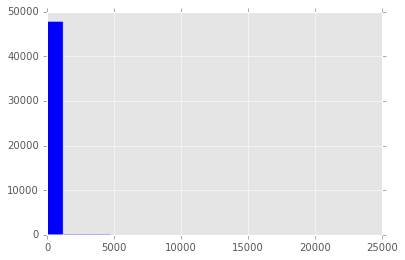

In [170]:
# get_qn(qn, gw_results)
# w[(w.result >= 1000) & (w.result < 1200)].duration.hist()

fig = plt.figure()
ax = fig.add_subplot(111)

#ml.duration.hist(bins=20, ax=ax, color='yellow')
#m.duration.hist(bins=20, ax=ax)

w.duration.hist(bins=20, ax=ax, color='b')

plt.show()

save = True
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/geolife-beijing-center-feb-2011-bbox-gw.png"
    fig.savefig(path, dpi=300, bbox_inches='tight')

#m.duration.describe()

/Users/rob/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rob/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


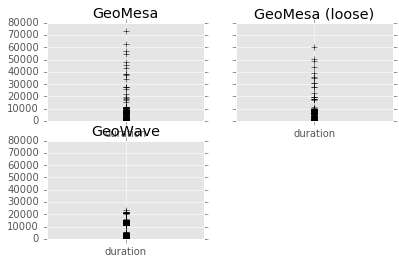

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Time')
ax.set_ylabel('duration (ms)')
plot_columns = { }

w["system_desc"] = w.apply(lambda r: "GeoWave", axis=1)
m["system_desc"] = m.apply(lambda r: "GeoMesa", axis=1)
ml["system_desc"] = ml.apply(lambda r: "GeoMesa (loose)", axis=1)
combd = pd.concat([w, m, ml])
ax.set_title(title)
ax.xaxis.set_visible(False)
combd.groupby(["system_desc"]).boxplot(column="duration", ax = ax, return_type='axes')


plt.show()
save = False
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/geolife-beijing-center-aug-2011.png"
    fig.savefig(path, dpi=300, bbox_inches='tight')

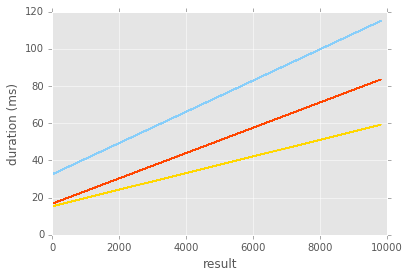

In [226]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('result')
ax.set_ylabel('duration (ms)')

mm = m[m.result < 10000]
wm = w[w.result < 10000]
mlm = ml[ml.result < 10000]

# sm = m
# sw = w
# sml = ml

sm = mm
sw = wm
sml = mlm

def do_scatter(loose=True):
    sm.plot.scatter(x="result", y="duration", ax=ax, color="red")
    if loose:
        sml.plot.scatter(x="result", y="duration", ax=ax, color="yellow")
    sw.plot.scatter(x="result", y="duration", ax=ax)


# mm[mm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2, color="red")
# wm[wm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2)

def do_regression(loose=True):
    mx = sm.result.values.reshape(-1,1)
    my = sm.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(mx, my)

    plt.plot(mx, regr.predict(mx), color='orangered', linewidth=1)
    
    if loose:
        mlx = sml.result.values.reshape(-1,1)
        mly = sml.duration.values.reshape(-1,1)

        regr = linear_model.LinearRegression()
        regr.fit(mlx, mly)

        plt.plot(mlx, regr.predict(mlx), color='gold', linewidth=1)

    wx = sw.result.values.reshape(-1,1)
    wy = sw.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(wx, wy)

    plt.plot(wx, regr.predict(wx), color='lightskyblue', linewidth=1)

# do_scatter(True)
do_regression(True)
# fig.set_figwidth(15)
plt.show()

save = True
# fname = "geolife-bbox-scatter-with-regression"
fname = "geolife-bbox-regression-with-loose-less-than-10000"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  


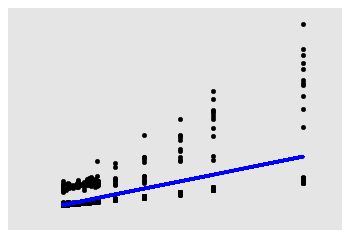

In [75]:


mx = m.result.values.reshape(-1,1)
my = m.duration.values.reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(mx, my)

plt.scatter(mx, my,  color='black')
plt.plot(mx, regr.predict(mx), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
